Disertation Code

Loading required packages

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE 
from collections import Counter 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

Lets import the Dataset

In [6]:
df=pd.read_csv('diabetic_data.csv')

Let view the dataset and run some general analysis on the dataset

In [9]:
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [11]:
df.shape

(101766, 50)

The dataset is made up of 50 features(columns) and 101766 observations

In [14]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Below is the description of the various columns in the dataset

# Data Set Description
- __Encounter ID__ **Unique** identifier of an encounter
- __Patient number__  **Unique** identifier of a patient
- __Race__ **Object** Caucasian, Asian, African American, Hispanic, and other
- __Gender__ **Object** male, female, and unknown/invalid
- __Age__ **Object** Age of observation
- __Weight__ **Object** Weight in pounds
- __Admission__ **type Integer** identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
- __Discharge disposition__ **Integer** identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
- __Admission source__ **Integer** identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
- __Time in hospital__ **Integer** number of days between admission and discharge
- __Payer code__ **Integer** identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
- __Medical specialty__ **Object** identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
- __Number of lab procedures__ **Numeric** Number of lab tests performed during the encounter
- __Number of procedures__ **Numeric** Number of procedures (other than lab tests) performed during the encounter
- __Number of medications__ **Numeric** Number of distinct generic names administered during the encounter
- __Number of outpatient visits__ **Numeric** Number of outpatient visits of the patient in the year preceding the encounter
- __Number of emergency visits__ **Numeric** Number of emergency visits of the patient in the year preceding the encounter
- __Number of inpatient visits__ **Numeric** Number of inpatient visits of the patient in the year preceding the encounter
- __Diagnosis 1__ **Object** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- __Diagnosis 2__ **Object** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- __Diagnosis 3__ **Object** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- __Number of diagnoses__ **Number** of diagnoses entered to the system 0%
- __Glucose serum__ **Object** test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
- __A1cResult__ **Object** test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
- __Change of medications__ **Object** Indicates if there was a change in diabetic medications (either dosage or generic name). **Values:** “change” and “no change”
- __Diabetes medications__ **Object** Indicates if there was any diabetic medication prescribed. **Values:** “yes” and “no”
- __24 features for medications__  **For the generic names:** metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
- __Readmitted__ **Object** Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

We would be creating a table to show a summary analysis on the dataset, also on every column on the table this will enable us to make proper decisions for feature engineering.

In [21]:
def summary(i):
    # Data types
    data_types = pd.DataFrame(i.dtypes, columns=['data type'])
    

    # Missing values
    missing_values = i.isnull().sum()

    # Duplicates
    duplicate_count = i.duplicated().sum()

    # Unique values
    unique_count = i.nunique()

    # Descriptive statistics
    statistics = i.describe(include='all').transpose()

    # Create summary DataFrame
    summry = pd.concat([data_types, missing_values, pd.Series(duplicate_count, name='# Duplicate'),
                        unique_count, statistics[['min', 'max', 'mean', 'std', 'top', 'freq']]], axis=1)

    # Rename columns
    summry.columns = ['Data Type', '# Missing', '# Duplicate', '# Unique', 'Min', 'Max', 'Mean', 'Std Dev', 'Top Value', 'Freq']

    return summry


In [23]:
# Summarizing Dataframe and removing the last row with no value
data_sum = summary(df).iloc[:-1]

# Apply styling
styled_summary=data_sum.style.set_caption("**Summary of the Data**").\
    background_gradient(cmap='Pastel2_r', axis=0).\
    set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})
# Display the styled summary
styled_summary

C:\Users\dell\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\dell\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


We shall be ploting a heat map to determine the correlation between numeric variable

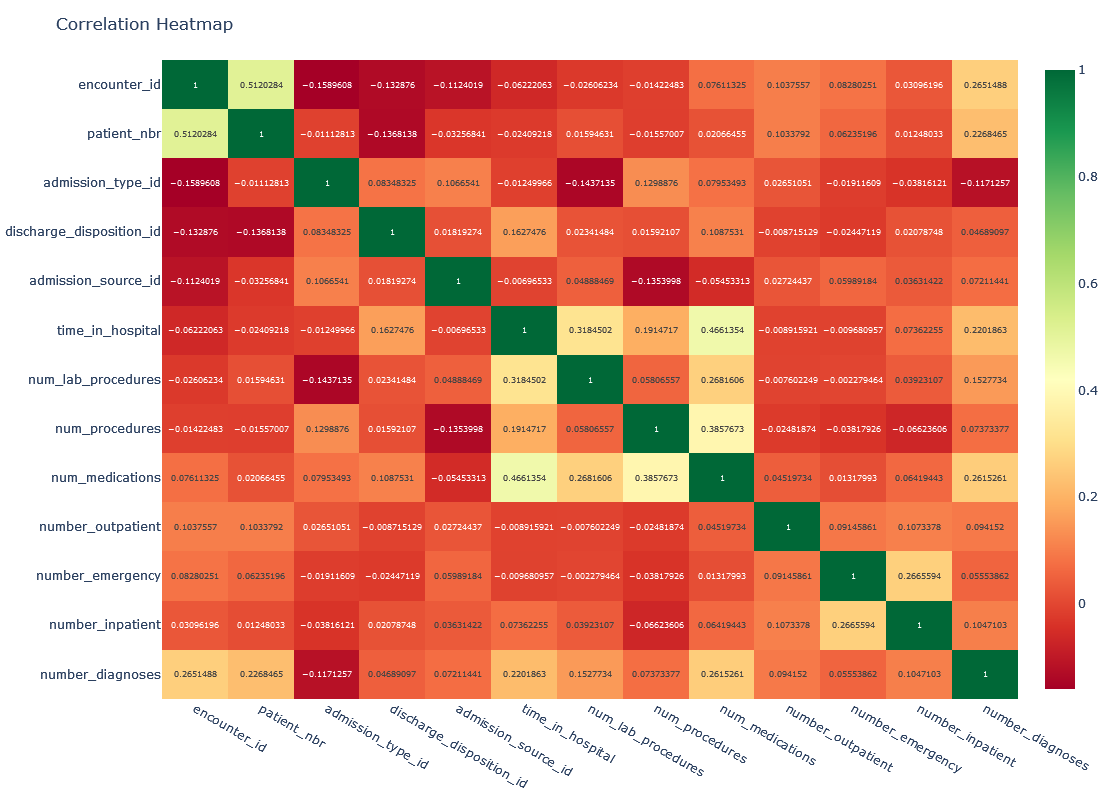

In [28]:
 # Display correlation heatmap for numeric features

corr = df.corr(numeric_only=True)
fig = px.imshow(corr, text_auto=True, aspect="auto", color_continuous_scale='RdYlGn')
fig.update_layout(title='Correlation Heatmap', width=800, height=800)
fig.show()
print("\n")       

We shall be performing some preprocessing before we do an exploratory data analysis on the data set,we shall carry out certain data engineering to enable us explore the dataset and build a machine learning model 

First of all we would need to encode the column admitted so it can be used for our exploratorary data analysis.

In [32]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

The readmitted column is made up of three unique categories the NO (Those that were not readmitted),>30(those that were readmitted but after 30 days) and the <30 (those that were readmitted in less than 30days). The essence of our model is to predict patients that will be readmitted in less than 30 days and so every other category is 0

In [35]:
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)

In [37]:
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No          0  
1                      No      Ch         Yes          0  
2                      No      No         Yes          0  
3                      No      Ch         Yes          0  
4                      No      Ch         Yes          0  

[5 rows x 50 columns]

We would also need to encode the age column to be grouped from 1-9 based on the age group of each observation age falls

In [40]:
# This function, replace_age_ranges, takes a feature (presumably containing age ranges) as input and 'values' represents corresponding numerical values assigned to each age range.
def replace_age_ranges(feature):
    # Create a dictionary to map age ranges to their corresponding numerical values
    age_mapping = {
        '[0-10)': 1,
        '[10-20)': 2,
        '[20-30)': 3,
        '[30-40)': 4,
        '[40-50)': 5,
        '[50-60)': 6,
        '[60-70)': 7,
        '[70-80)': 8,
        '[80-90)': 9,
        '[90-100)': 10
    }
    
    # Replace each age range in the 'feature' with the corresponding numerical value using the mapping dictionary
    feature = feature.replace(age_mapping)
    
    return feature

In [42]:
df['age']=replace_age_ranges(df['age'])

In [44]:
df.head()

encounter_id  patient_nbr             race  gender  age weight  \
0       2278392      8222157        Caucasian  Female    1      ?   
1        149190     55629189        Caucasian  Female    2      ?   
2         64410     86047875  AfricanAmerican  Female    3      ?   
3        500364     82442376        Caucasian    Male    4      ?   
4         16680     42519267        Caucasian    Male    5      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No          0  
1                      No      Ch         Yes          0  
2                      No      No         Yes          0  
3                      No      Ch         Yes          0  
4                      No      Ch         Yes          0  

[5 rows x 50 columns]

Let's analyse the race column

In [47]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

We need to replace the ? category with other

In [50]:
# this code will replace any occurrences of '?' in the 'race' column with 'Other'.

df['race'] = df['race'].apply(lambda x: 'Other' if x == '?' else x)

In [52]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: count, dtype: int64

readmitted
0    90409
1    11357
Name: count, dtype: int64


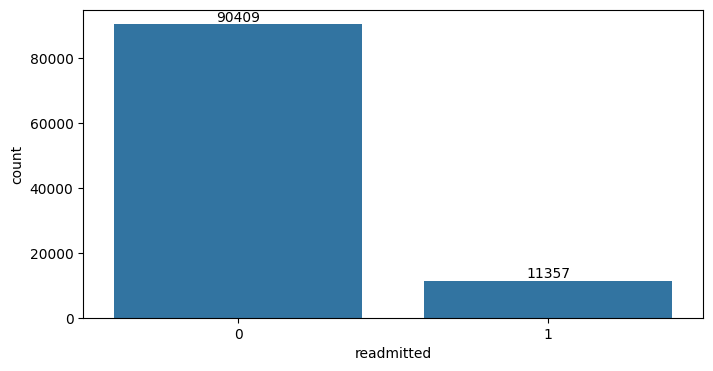

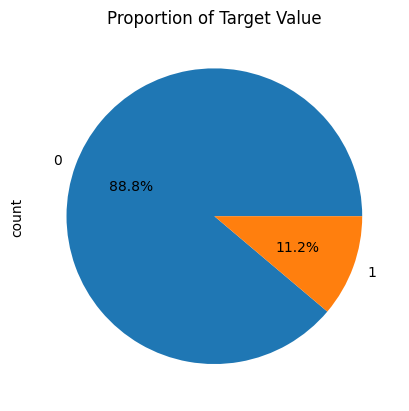

In [58]:
print(df.readmitted.value_counts())
# Set the figure size
plt.figure(figsize=(8, 4))

# Create the count plot
ax = sns.countplot(x='readmitted', data=df)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

# Pie chart
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

We acknowledge that the bulk of the observations in our dataset are not readmitted, causing an imbalance. In order to tackle this challenge, we will employ SMOTE (Synthetic Minority Over-sampling Technique), a widely utilised method for addressing the issue of class imbalance in datasets.

Let's examine the race variable

race
Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: count, dtype: int64


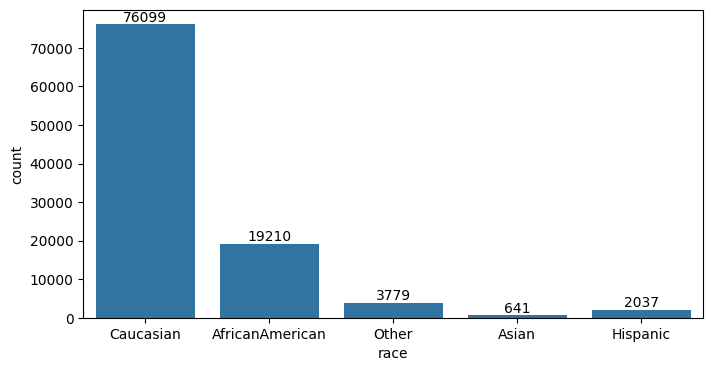

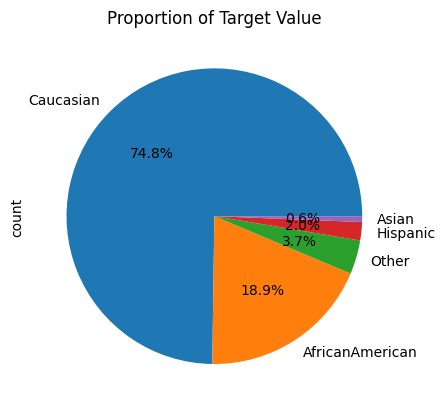

Proportion of Race
race
Caucasian          74.778413
AfricanAmerican    18.876639
Other               3.713421
Hispanic            2.001651
Asian               0.629876
Name: proportion, dtype: float64


In [64]:
print(df.race.value_counts())
# Set the figure size
plt.figure(figsize=(8, 4))

# Create the count plot
ax = sns.countplot(x='race', data=df)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

# Pie chart
df.race.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

Lets see the distribution of readmitted observation among the various race category

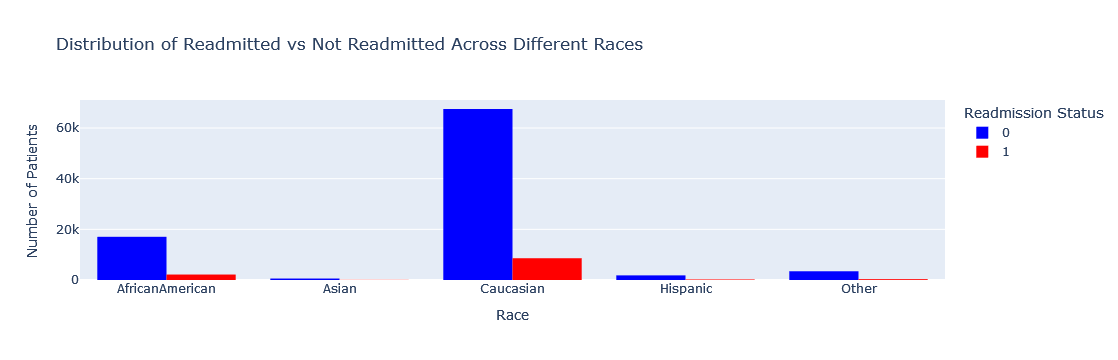

In [67]:
# Group the data by race and readmitted status, then count occurrences
race_readmitted_counts = df.groupby(['race', 'readmitted']).size().reset_index(name='count')

# Create a grouped bar chart using Plotly Express with side-by-side bars
fig = px.histogram(
    race_readmitted_counts,
    x='race',
    y='count',
    color='readmitted',
    barmode='group',  # ensure bars are side by side
    title='Distribution of Readmitted vs Not Readmitted Across Different Races',
    labels={'readmitted': 'Readmitted', 'count': 'Number of Patients'},
    color_discrete_map={1: 'red', 0: 'blue'}
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Race',
    yaxis_title='Number of Patients',
    legend_title='Readmission Status',
    bargap=0.2  # space between bars
)

# Display the plot
fig.show()

Lets now examine the mean probability of readmission of each race considering that our dataset is skewed and we have more Caucasians

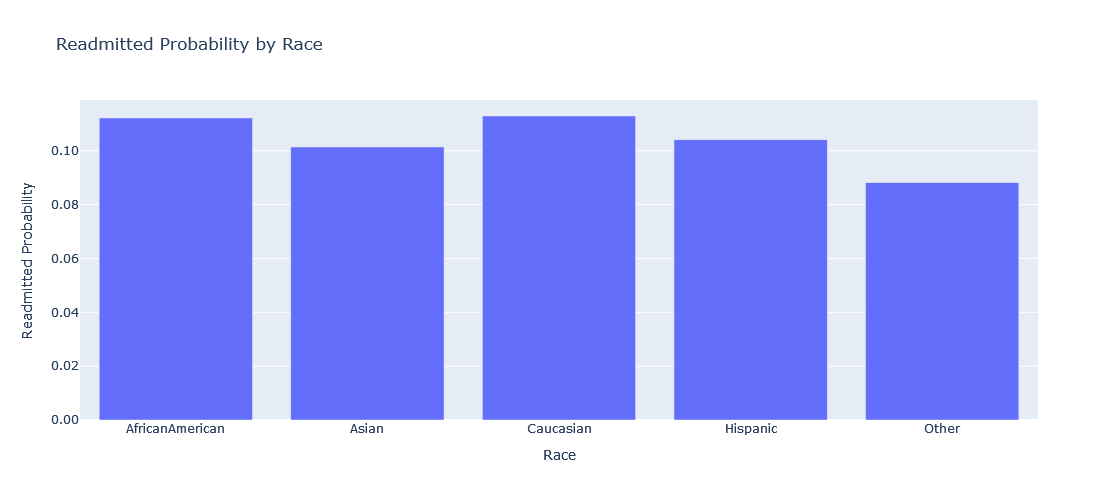

In [70]:
# Calculate the mean readmission probability by race
race_readmitted_means = df.groupby('race')['readmitted'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(
    race_readmitted_means,  # DataFrame containing the aggregated data
    x='race',  # x-axis variable
    y='readmitted',  # y-axis variable (mean readmission probability)
    title='Readmitted Probability by Race',  # chart title
    labels={'readmitted': 'Readmitted Probability', 'race': 'Race'},  # axis labels
    height=500  # height of the figure
)

# Update layout for better visualization
fig.update_layout(
    yaxis=dict(tickformat=".2f"),  # format y-axis to show probabilities
    xaxis_title='Race',
    yaxis_title='Readmitted Probability',
    bargap=0.2  # space between bars
)

# Display the plot
fig.show()

We shall now be looking at the distribution based on gender 

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


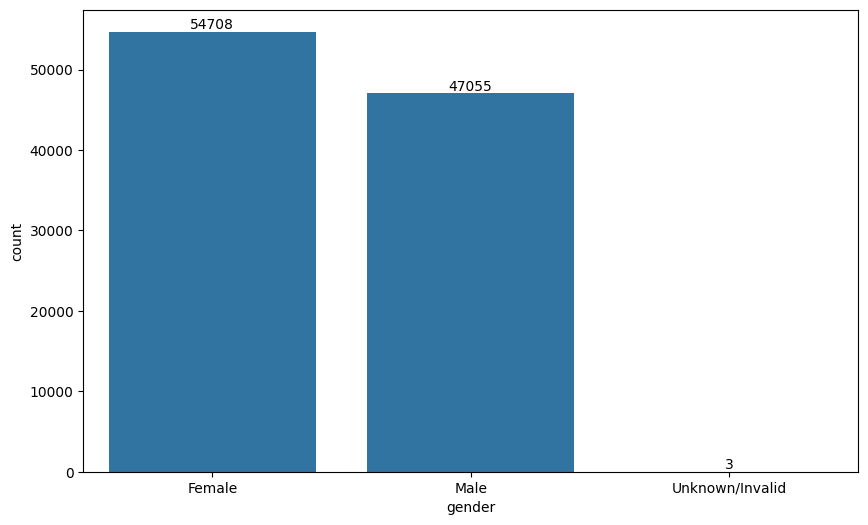

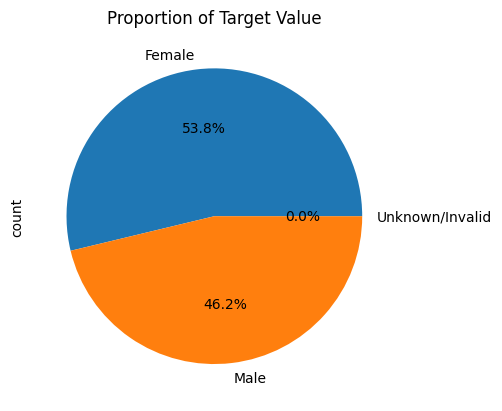

Proportion of Gender
gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: proportion, dtype: float64


In [73]:
print(df.gender.value_counts())
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
ax = sns.countplot(x='gender', data=df)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

# Pie chart
df.gender.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

print("Proportion of Gender")
print(df.gender.value_counts(normalize = True)*100)

We would drop the Unknown entries of gender

In [76]:

# removing rows with unkown gender type
df.drop(index=[30506, 75551, 82573],inplace=True)

gender
Female    54708
Male      47055
Name: count, dtype: int64


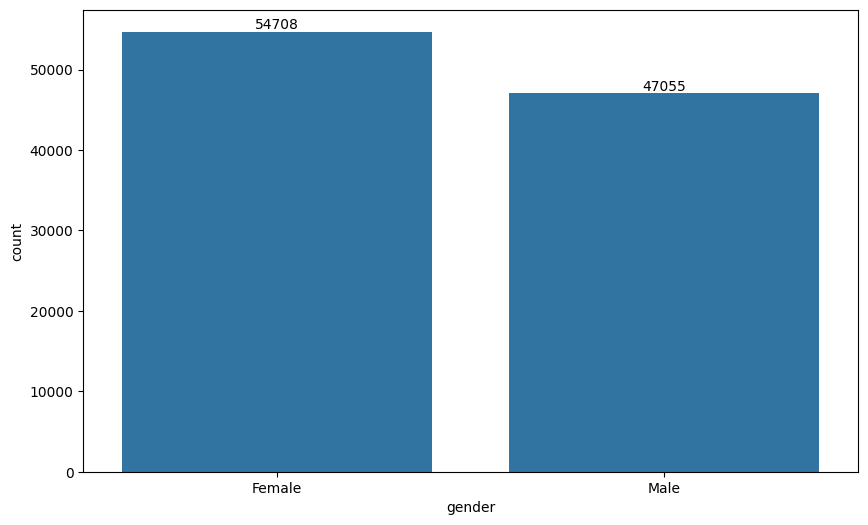

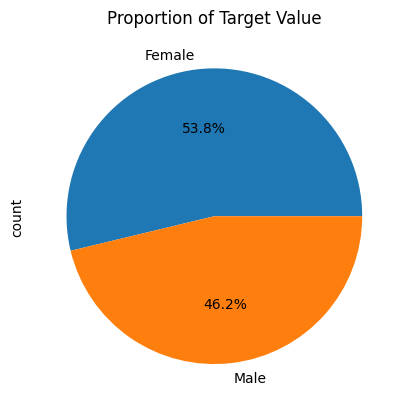

Proportion of Gender
gender
Female    53.760208
Male      46.239792
Name: proportion, dtype: float64


In [78]:
print(df.gender.value_counts())
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
ax = sns.countplot(x='gender', data=df)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

# Pie chart
df.gender.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

print("Proportion of Gender")
print(df.gender.value_counts(normalize = True)*100)

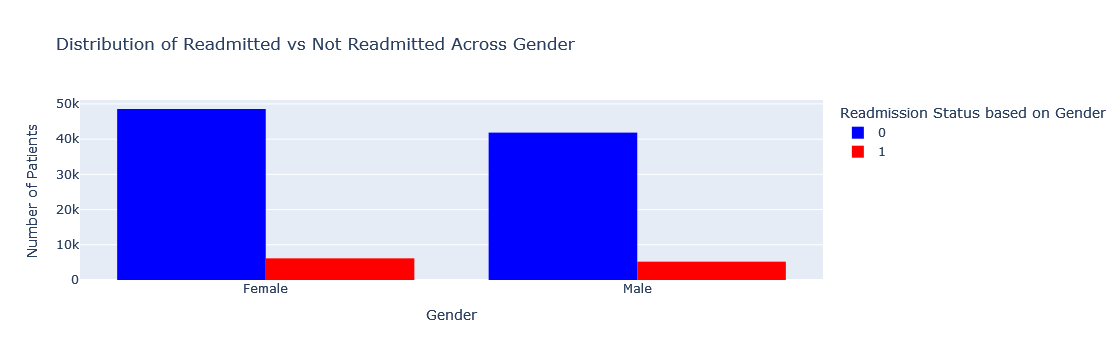

In [80]:
# Group the data by race and readmitted status, then count occurrences
race_readmitted_counts = df.groupby(['gender', 'readmitted']).size().reset_index(name='count')

# Create a grouped bar chart using Plotly Express with side-by-side bars
fig = px.histogram(
    race_readmitted_counts,
    x='gender',
    y='count',
    color='readmitted',
    barmode='group',  # ensure bars are side by side
    title='Distribution of Readmitted vs Not Readmitted Across Gender',
    labels={'readmitted': 'Readmitted', 'count': 'Number of Patients'},
    color_discrete_map={1: 'red', 0: 'blue'}
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Patients',
    legend_title='Readmission Status based on Gender',
    bargap=0.2  # space between bars
)

# Display the plot
fig.show()

Let's examine the mean probability based on gender

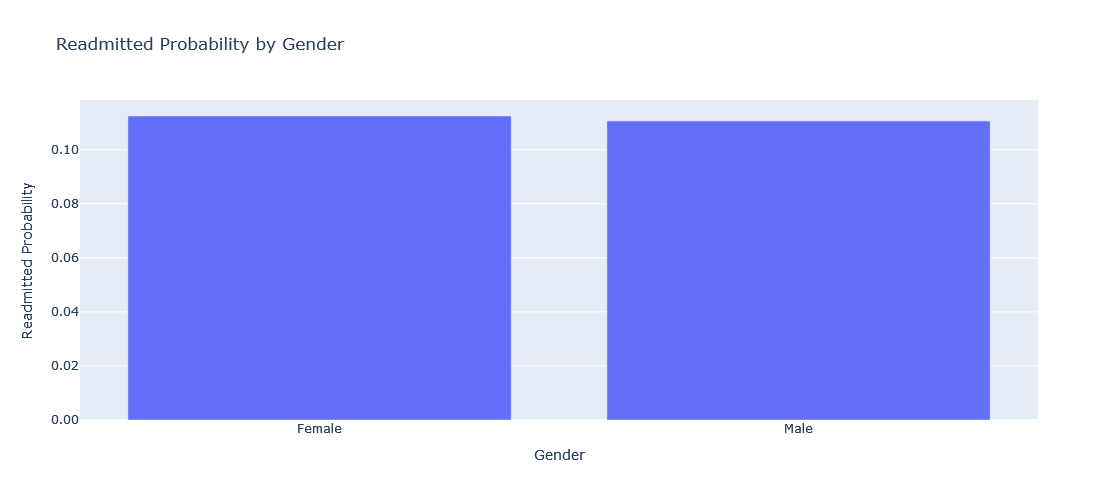

In [83]:
# Calculate the mean readmission probability by gender
gender_readmitted_means = df.groupby('gender')['readmitted'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(
    gender_readmitted_means,  # DataFrame containing the aggregated data
    x='gender',  # x-axis variable
    y='readmitted',  # y-axis variable (mean readmission probability)
    title='Readmitted Probability by Gender',  # chart title
    labels={'readmitted': 'Readmitted Probability', 'race': 'Race'},  # axis labels
    height=500  # height of the figure
)

# Update layout for better visualization
fig.update_layout(
    yaxis=dict(tickformat=".2f"),  # format y-axis to show probabilities
    xaxis_title='Gender',
    yaxis_title='Readmitted Probability',
    bargap=0.2  # space between bars
)

# Display the plot
fig.show()

Finally lets explore the readmission distribution based on the age category. We would first look at the age distribution, then we check the readmission based on age

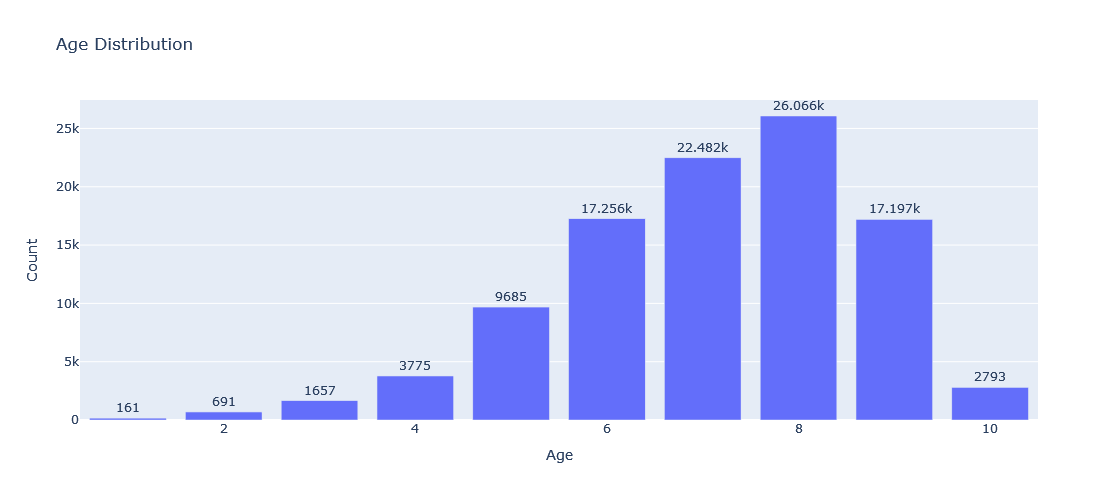

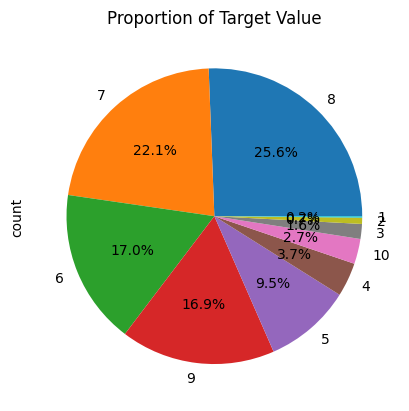

Proportion of Age
age
8     25.614418
7     22.092509
6     16.957047
9     16.899069
5      9.517212
4      3.709600
10     2.744612
3      1.628293
2      0.679029
1      0.158211
Name: proportion, dtype: float64


In [86]:
# Count occurrences of each age
age_counts = df['age'].value_counts().reset_index()

# Rename the columns for clarity
age_counts.columns = ['age', 'count']

# Create the count plot using Plotly Express
fig = px.bar(
    age_counts,  # DataFrame with counts
    x='age',  # Age values on x-axis
    y='count',  # Count of each age on y-axis
    labels={'age': 'Age', 'count': 'Count'},  # Rename axis labels
    title='Age Distribution'  # Set the title of the chart
)

# Add labels to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Set the figure size
fig.update_layout(width=800, height=500)

# Show the plot
fig.show()

# Pie chart
df.age.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

print("Proportion of Age")
print(df.age.value_counts(normalize = True)*100)

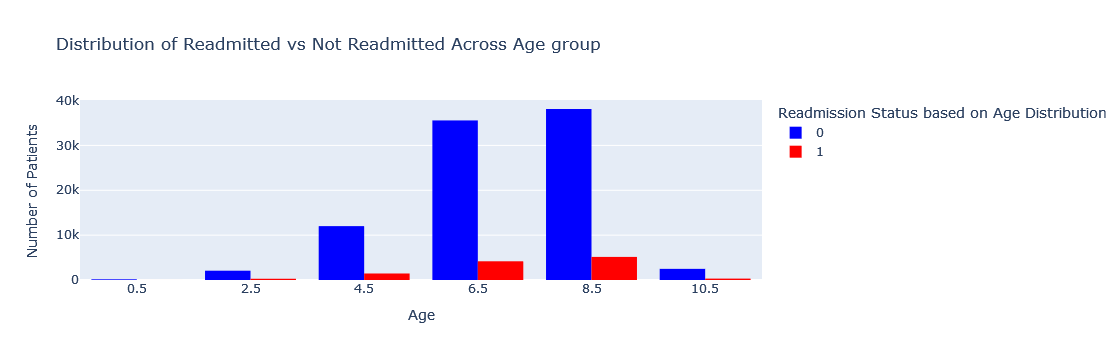

In [88]:
# Group the data by race and readmitted status, then count occurrences
race_readmitted_counts = df.groupby(['age', 'readmitted']).size().reset_index(name='count')

# Create a grouped bar chart using Plotly Express with side-by-side bars
fig = px.histogram(
    race_readmitted_counts,
    x='age',
    y='count',
    color='readmitted',
    barmode='group',  # ensure bars are side by side
    title='Distribution of Readmitted vs Not Readmitted Across Age group',
    labels={'readmitted': 'Readmitted', 'count': 'Number of Patients'},
    color_discrete_map={1: 'red', 0: 'blue'}
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Number of Patients',
    legend_title='Readmission Status based on Age Distribution',
    bargap=0.2  # space between bars
)

# Display the plot
fig.show()

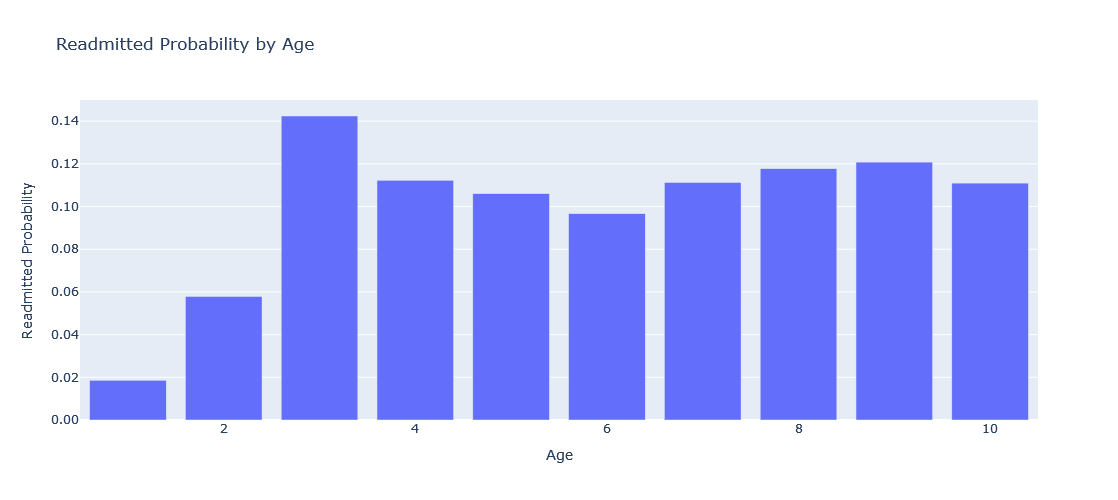

In [90]:
# Calculate the mean readmission probability by gender
age_readmitted_means = df.groupby('age')['readmitted'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(
    age_readmitted_means,  # DataFrame containing the aggregated data
    x='age',  # x-axis variable
    y='readmitted',  # y-axis variable (mean readmission probability)
    title='Readmitted Probability by Age',  # chart title
    labels={'readmitted': 'Readmitted Probability', 'age': 'Age'},  # axis labels
    height=500  # height of the figure
)

# Update layout for better visualization
fig.update_layout(
    yaxis=dict(tickformat=".2f"),  # format y-axis to show probabilities
    xaxis_title='Age',
    yaxis_title='Readmitted Probability',
    bargap=0.2  # space between bars
)

# Display the plot
fig.show()

We see a high probability of readmission among the age group 20-30 years which is quite unusual, but we would analyse further as we proceed

We shall be performing some preprocessing and cleaning of our dataset, removing columns with over 70% missing values, this is required to to build our machine learning model

In [94]:
#max_glu_serum ,weight and A1Cresult has more than 85% null values so reoving it.
# examide and citoglipton has only one value so also removing it.
df.drop(columns=['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty'],inplace=True)
# Display the shape of the dataset after dropping columns
print(f"Shape of the dataset after dropping columns: {df.shape}")
print("\n")

Shape of the dataset after dropping columns: (101763, 43)




In [96]:
# removing null values from diag_1,2 and 3.
index = df[(df['diag_1'] == '?') | (df['diag_2'] == '?') | (df['diag_3'] == '?')].index.tolist()
df.drop(index=index,inplace=True)

The admission type ID, discharge disposition ID, and admission source ID have been clustered based on the mapping below to help with dimension reduction, which will improve our models by increasing model performance, lowering computational cost, and mitigating against the curse of dimensionality (where with high dimensional spaces, data points become sparse that makes it difficult for algorithms to find pattern) amongst others. Similar groups are represented by these clusters.


admission_type_id,description 1,Emergency 2,Urgent 3,Elective 4,Newborn 5,Not Available 6,NULL 7,Trauma Center 8,Not Mapped , discharge_disposition_id,description 1,Discharged to home 2,Discharged/transferred to another short term hospital 3,Discharged/transferred to SNF 4,Discharged/transferred to ICF 5,Discharged/transferred to another type of inpatient care institution 6,Discharged/transferred to home with home health service 7,Left AMA 8,Discharged/transferred to home under care of Home IV provider 9,Admitted as an inpatient to this hospital 10,Neonate discharged to another hospital for neonatal aftercare 11,Expired 12,Still patient or expected to return for outpatient services 13,Hospice / home 14,Hospice / medical facility 15,Discharged/transferred within this institution to Medicare approved swing bed 16,Discharged/transferred/referred another institution for outpatient services 17,Discharged/transferred/referred to this institution for outpatient services 18,NULL 19,"Expired at home. Medicaid only, hospice." 20,"Expired in a medical facility. Medicaid only, hospice." 21,"Expired, place unknown. Medicaid only, hospice." 22,Discharged/transferred to another rehab fac including rehab units of a hospital . 23,Discharged/transferred to a long term care hospital.24,Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare. 25,Not Mapped 26,Unknown/Invalid 30,Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere 27,Discharged/transferred to a federal health care facility. 28,Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital 29,Discharged/transferred to a Critical Access Hospital (CAH). , admission_source_id,description 1, Physician Referral 2,Clinic Referral 3,HMO Referral 4,Transfer from a hospital 5, Transfer from a Skilled Nursing Facility (SNF) 6, Transfer from another health care facility 7, Emergency Room 8, Court/Law Enforcement 9, Not Available 10, Transfer from critial access hospital 11,Normal Delivery 12, Premature Delivery 13, Sick Baby 14, Extramural Birth 15,Not Available 17,NULL 18, Transfer From Another Home Health Agency 19,Readmission to Same Home Health Agency 20, Not Mapped 21,Unknown/Invalid 22, Transfer from hospital inpt/same fac reslt in a sep claim 23, Born inside this hospital 24, Born outside this hospital 25, Transfer from Ambulatory Surgery Center 26,Transfer from Hospice.

In [100]:
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 5 if x in (6,8) else x)
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 1 if x == 4 else 2 if x==7 else x )

In [102]:
#Discharged Home: 1, 6, 8
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 1 if x in (6,8) else x)

#Uncategorized/Unknown: 18, 25, 26, 12
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 18 if x in (25,26,12) else x)

#Expired:11, 19, 20, 21
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 11 if x in (19,20,21) else x)

#Hospice:13, 14
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 13 if x ==14 else x)

# Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 2 if x in ( 9, 10, 23, 27, 28, 29) else x)

#Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 3 if x in ( 4, 5, 15, 24) else x)

#Discharged to Outpatient Services:16, 17
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)

#Discharged to Outpatient Services:16, 17
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)

In [104]:
# Unknown/Invalid: 9, 15, 17, 20, 21
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 9 if x in (15, 17, 20, 21) else x)

# Physician/Clinic Referral:1, 2, 3
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 1 if x in (2,3) else x)

#Transfer from Hospital: 4, 10, 22
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 4 if x in (10,22) else x)


#Transfer from Facility:5, 6, 18, 19, 25, 26
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 5 if x in (6, 18, 19, 25, 26) else x)


#Delivery:11, 12, 13, 14
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 11 if x in (12, 13, 14) else x)

In [106]:
# all three diag features have more than 700 unqie we are grouping them based on ICD-9 codes
diag1_list=[]
diag2_list=[]
diag3_list=[]

In [108]:
def cluster(col, diag_list):
    for x in df[col]:  # Iterate through each value in the specified column of the DataFrame
        # Check if the value contains 'V' or 'E'
        if 'V' in x or 'E' in x: 
            diag_list.append(18)  # Assign a cluster value of 18 for 'V' or 'E' and append to the list
        else:
            x = float(x)  # Convert the value to a float for numerical comparisons
            
            # The following conditions will assign cluster values based on specific ranges of float values
            if 1 <= x <= 139:
                diag_list.append(1)   # Cluster 1: x is between 1 and 139
            elif 140 <= x <= 239:
                diag_list.append(2)   # Cluster 2: x is between 140 and 239
            elif 240 <= x <= 279:
                diag_list.append(3)   # Cluster 3: x is between 240 and 279
            elif 280 <= x <= 289:
                diag_list.append(4)   # Cluster 4: x is between 280 and 289
            elif 290 <= x <= 319:
                diag_list.append(5)   # Cluster 5: x is between 290 and 319
            elif 320 <= x <= 389:
                diag_list.append(6)   # Cluster 6: x is between 320 and 389
            elif 390 <= x <= 459:
                diag_list.append(7)   # Cluster 7: x is between 390 and 459
            elif 460 <= x <= 519:
                diag_list.append(8)   # Cluster 8: x is between 460 and 519
            elif 520 <= x <= 579:
                diag_list.append(9)   # Cluster 9: x is between 520 and 579
            elif 580 <= x <= 629:
                diag_list.append(10)  # Cluster 10: x is between 580 and 629
            elif 630 <= x <= 679:
                diag_list.append(11)  # Cluster 11: x is between 630 and 679
            elif 680 <= x <= 709:
                diag_list.append(12)  # Cluster 12: x is between 680 and 709
            elif 710 <= x <= 739:
                diag_list.append(13)  # Cluster 13: x is between 710 and 739
            elif 740 <= x <= 759:
                diag_list.append(14)  # Cluster 14: x is between 740 and 759
            elif 760 <= x <= 779:
                diag_list.append(15)  # Cluster 15: x is between 760 and 779
            elif 780 <= x <= 799:
                diag_list.append(16)  # Cluster 16: x is between 780 and 799
            elif 800 <= x <= 999:
                diag_list.append(17)  # Cluster 17: x is between 800 and 999



In [110]:
# List of column names that will be processed
diag_columns = ['diag_1', 'diag_2', 'diag_3']

# Iterate over each column name
for col in diag_columns:
    diag_list = []  # Initialize an empty list to store cluster values
    cluster(col, diag_list)  # Apply the cluster function to populate the list
    df[col] = diag_list  # Update the DataFrame with the new cluster values



In [112]:
df['change']=df['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [114]:
df.head()

encounter_id  patient_nbr             race  gender  age  admission_type_id  \
1        149190     55629189        Caucasian  Female    2                  1   
2         64410     86047875  AfricanAmerican  Female    3                  1   
3        500364     82442376        Caucasian    Male    4                  1   
4         16680     42519267        Caucasian    Male    5                  1   
5         35754     82637451        Caucasian    Male    6                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   
5                         1                    1                 3   

   num_lab_procedures  ...  tolazamide  insulin  glyburide-metformin  \
1                  59  ...          No       Up                   No   
2                  11  ...          No       No                   No   
3                  44  ...          No       Up                   No   
4                  51  ...          No   Steady                   No   
5                  31  ...          No   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   
5                   No                        No                       No   

   metformin-pioglitazone  change  diabetesMed readmitted  
1                      No     Yes          Yes          0  
2                      No      No          Yes          0  
3                      No     Yes          Yes          0  
4                      No     Yes          Yes          0  
5                      No      No          Yes          0  

[5 rows x 43 columns]

In [116]:
# List of medicine columns to be processed
medicines = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
    'miglitol', 'troglitazone', 'tolazamide', 'insulin', 
    'glyburide-metformin', 'glipizide-metformin', 
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
    'metformin-pioglitazone'
]

# Iterate over each medicine column
for col in medicines:
    # Convert 'No' to 0 and other values to 1
    df[col] = df[col].apply(lambda x: 0 if x == 'No' else 1)


In [118]:
# Convert 'No' to 0 and other values to 1 for the specified columns
df[['change', 'diabetesMed']] = df[['change', 'diabetesMed']].applymap(lambda x: 0 if x == 'No' else 1)


In [120]:
# There are many entries of same users in dataset it will make our ML algorithm biased so removing them.
df.drop_duplicates(subset='patient_nbr',keep='first',inplace=True)

In [122]:
# We shall be droping the 'encounter_id','patient_nbr' as it would not be needed in building our model
df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

In [124]:
df['gender']=df['change'].apply(lambda x: 0 if x=='Female' else 1)

In [173]:
df.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
1     2       1    2                  1                         1   
2     0       1    3                  1                         1   
3     2       1    4                  1                         1   
4     2       1    5                  1                         1   
5     2       1    6                  2                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   
5                    1                 3                  31               6   

   num_medications  ...  tolazamide  insulin  glyburide-metformin  \
1               18  ...           0        1                    0   
2               13  ...           0        0                    0   
3               16  ...           0        1                    0   
4                8  ...           0        1                    0   
5               16  ...           0        1                    0   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
1                    0                         0                        0   
2                    0                         0                        0   
3                    0                         0                        0   
4                    0                         0                        0   
5                    0                         0                        0   

   metformin-pioglitazone  change  diabetesMed  readmitted  
1                       0       1            1           0  
2                       0       0            1           0  
3                       0       1            1           0  
4                       0       1            1           0  
5                       0       0            1           0  

[5 rows x 41 columns]

In [175]:
# used label encoder for race feature.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['race']=encoder.fit_transform(df['race'])

In [177]:
df.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
1     2       1    2                  1                         1   
2     0       1    3                  1                         1   
3     2       1    4                  1                         1   
4     2       1    5                  1                         1   
5     2       1    6                  2                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   
5                    1                 3                  31               6   

   num_medications  ...  tolazamide  insulin  glyburide-metformin  \
1               18  ...           0        1                    0   
2               13  ...           0        0                    0   
3               16  ...           0        1                    0   
4                8  ...           0        1                    0   
5               16  ...           0        1                    0   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
1                    0                         0                        0   
2                    0                         0                        0   
3                    0                         0                        0   
4                    0                         0                        0   
5                    0                         0                        0   

   metformin-pioglitazone  change  diabetesMed  readmitted  
1                       0       1            1           0  
2                       0       0            1           0  
3                       0       1            1           0  
4                       0       1            1           0  
5                       0       0            1           0  

[5 rows x 41 columns]

Model building

In [180]:
'''X=df.drop(columns='readmitted')
y=df['readmitted']'''

"X=df.drop(columns='readmitted')\ny=df['readmitted']"

In [182]:
X=df[['num_lab_procedures', 'num_medications', 'diag_3', 'diag_1', 'age',
       'diag_2', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'race', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']]
y=df['readmitted']

In [184]:
# Initialize SMOTE with oversampling strategy focused on the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)

# Apply SMOTE to resample the dataset
X_res, y_res = smote.fit_resample(X, y)

In [185]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
'''

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)\n'

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

We would build different machine learning models to test for the best model

In [191]:
# Ensure correct splitting and usage after resampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")

Shape of X_train: (102660, 25)
Shape of X_test: (25666, 25)
Length of y_train: 102660
Length of y_test: 25666


To identify the key characteristics from our dataset that most accurately predict readmission after 30 days, we would use be checking how important the features in out model are in this causing readmission. The sklearn.inspection package's permutation_importance will be used to calculate the feature importance of our model.

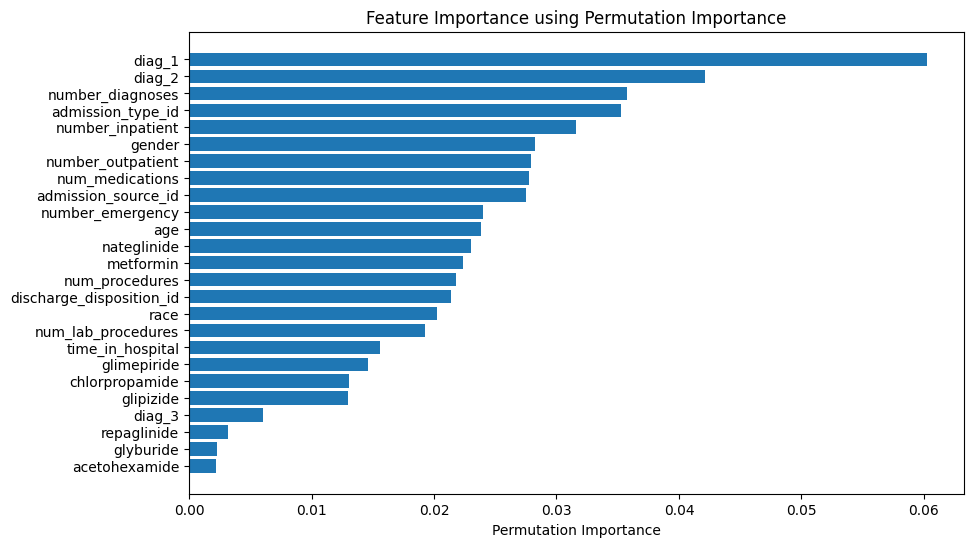

Important Features with Contribution Ratio >= 5%:
                     Feature  Importance  Contribution Ratio
1            num_medications    0.028240            0.050218
3                     diag_1    0.035265            0.062710
12  discharge_disposition_id    0.031594            0.056183
13                   insulin    0.060270            0.107177
14               diabetesMed    0.042145            0.074946
16                 metformin    0.035744            0.063562


In [196]:
# Train the CatBoost model on the full feature set
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)


# Display the results
feature_names = df.drop('readmitted', axis=1).columns  # Use original feature names from the dataset
sorted_idx = perm_importance.importances_mean.argsort()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation Importance")
plt.show()

# Compute permutation feature importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for permutation importance results
perm_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})
perm_importances_df['Contribution Ratio'] = perm_importances_df['Importance'] / perm_importances_df['Importance'].sum()

# Set a cutoff for important features (3% contribution ratio)
cutoff = 0.05
important_features_df = perm_importances_df[perm_importances_df['Contribution Ratio'] >= cutoff]

# Print filtered important features based on contribution ratio
print(f"Important Features with Contribution Ratio >= {cutoff * 100:.0f}%:")
print(important_features_df)
#perm_importances_df['Contribution Ratio'] = perm_importances_df['Importance'] / perm_importances_df['Importance'].sum()

#print("\nPermutation Feature Importances:")
#print(perm_importances_df)

Selected Important Features with Contribution Ratio >= 5%:
['num_medications', 'diag_1', 'discharge_disposition_id', 'insulin', 'diabetesMed', 'metformin']

Accuracy using top 5% features: 0.6797

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67     12937
           1       0.67      0.70      0.69     12729

    accuracy                           0.68     25666
   macro avg       0.68      0.68      0.68     25666
weighted avg       0.68      0.68      0.68     25666



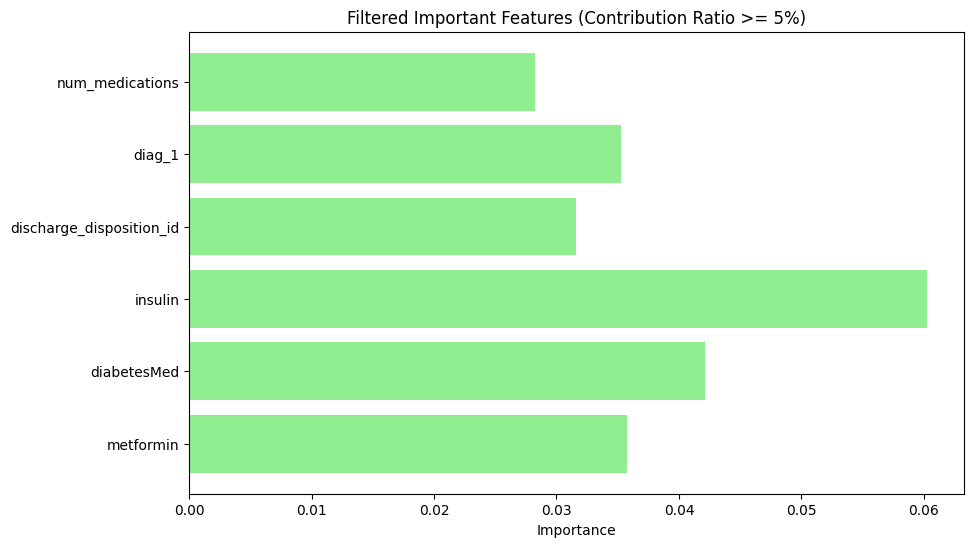

In [143]:
# Train the CatBoost model on the full feature set
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Compute permutation feature importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for permutation importance results
perm_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})
perm_importances_df['Contribution Ratio'] = perm_importances_df['Importance'] / perm_importances_df['Importance'].sum()

# Set a cutoff for important features (top 5% contribution ratio)
cutoff = 0.05
important_features_df = perm_importances_df[perm_importances_df['Contribution Ratio'] >= cutoff]

# Extract the names of the important features
important_features = important_features_df['Feature'].tolist()

print(f"Selected Important Features with Contribution Ratio >= {cutoff * 100:.0f}%:")
print(important_features)

# Train the CatBoost model using only the selected important features
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

model_filtered = CatBoostClassifier(verbose=0, random_state=42)
model_filtered.fit(X_train_filtered, y_train)

# Evaluate the model
y_pred = model_filtered.predict(X_test_filtered)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy using top 5% features: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Plotting the filtered important features based on the cutoff
plt.figure(figsize=(10, 6))
plt.barh(important_features_df['Feature'], important_features_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title(f'Filtered Important Features (Contribution Ratio >= {cutoff * 100:.0f}%)')
plt.gca().invert_yaxis()
plt.show()


Training and evaluating SVM...
Classification Report for SVM:
              precision    recall  f1-score       support
0              0.656435  0.541235  0.593294  16200.000000
1              0.603097  0.711057  0.652643  15882.000000
accuracy       0.625304  0.625304  0.625304      0.625304
macro avg      0.629766  0.626146  0.622968  32082.000000
weighted avg   0.630030  0.625304  0.622674  32082.000000

Training and evaluating Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score       support
0              0.681099  0.670000  0.675504  16200.000000
1              0.668896  0.680015  0.674410  15882.000000
accuracy       0.674958  0.674958  0.674958      0.674958
macro avg      0.674998  0.675008  0.674957  32082.000000
weighted avg   0.675058  0.674958  0.674962  32082.000000

Training and evaluating Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score       support
0              0.

C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Classification Report for XGBoost:
              precision    recall  f1-score       support
0              0.687200  0.662469  0.674608  16200.000000
1              0.667902  0.692419  0.679939  15882.000000
accuracy       0.677296  0.677296  0.677296      0.677296
macro avg      0.677551  0.677444  0.677274  32082.000000
weighted avg   0.677646  0.677296  0.677247  32082.000000


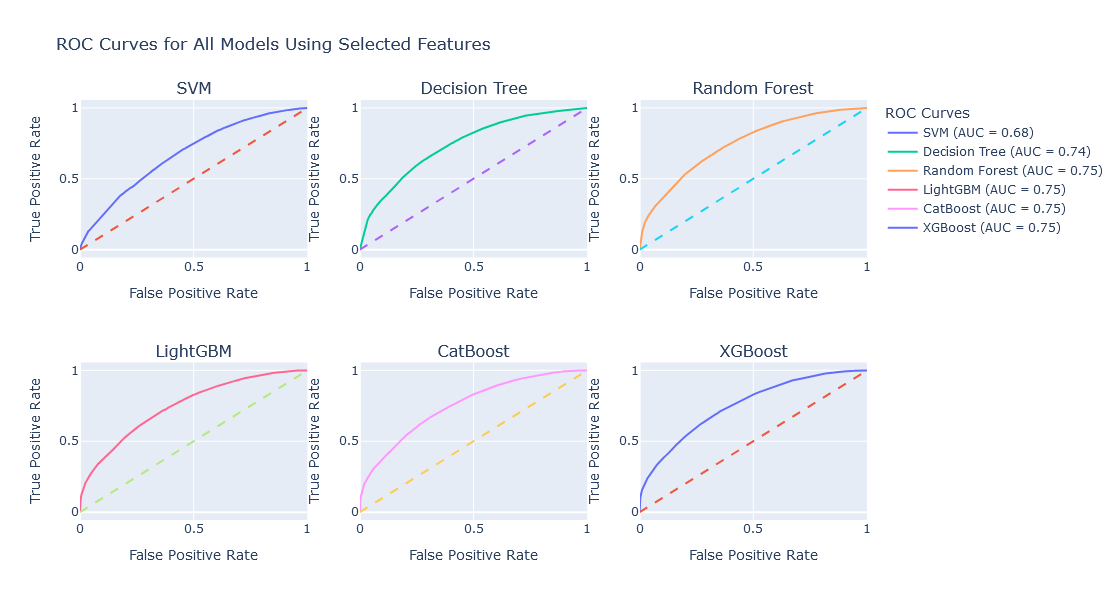

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming X_res and y_res are already defined
# Replace with the actual code to generate X_res and y_res if needed
# X_res, y_res = some_preprocessing_function()  # This is your dataset after preprocessing

# Selected important features
selected_features = ['num_medications', 'diag_1', 'discharge_disposition_id', 'insulin', 'diabetesMed', 'metformin']

# Split the dataset into training and test sets using only selected features
X_train, X_test, y_train, y_test = train_test_split(X_res[selected_features], y_res, test_size=0.25, random_state=42)

# Initialize the models
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store results
results = {}

# Iterate over each model
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report_dict = classification_report(y_test, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report_dict).transpose()
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store the results
    results[name] = {
        "accuracy": accuracy,
        "classification_report": class_report_df,
        "confusion_matrix": conf_matrix,
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }
    
    # Print the classification report as a table
    print(f"Classification Report for {name}:")
    print(class_report_df.to_string())  # Print the classification report as a table

# Plotting ROC Curves for all models
fig = make_subplots(rows=2, cols=3, subplot_titles=list(results.keys()))

for idx, (name, result) in enumerate(results.items()):
    row = (idx // 3) + 1
    col = (idx % 3) + 1
    fig.add_trace(
        go.Scatter(
            x=result['fpr'],
            y=result['tpr'],
            mode='lines',
            name=f'{name} (AUC = {result["roc_auc"]:.2f})',
            showlegend=True
        ),
        row=row,
        col=col
    )
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[0, 1],
            mode='lines',
            line=dict(dash='dash'),
            showlegend=False
        ),
        row=row,
        col=col
    )
    fig.update_xaxes(title_text="False Positive Rate", row=row, col=col)
    fig.update_yaxes(title_text="True Positive Rate", row=row, col=col)

fig.update_layout(
    title_text="ROC Curves for All Models Using Selected Features",
    height=600,
    width=900,
    legend_title_text='ROC Curves'
)

fig.show()


Training and evaluating SVM...
Classification Report for SVM:
              precision    recall  f1-score       support
0              0.748233  0.621860  0.679218  12937.000000
1              0.671986  0.787336  0.725102  12729.000000
accuracy       0.703927  0.703927  0.703927      0.703927
macro avg      0.710109  0.704598  0.702160  25666.000000
weighted avg   0.710418  0.703927  0.701974  25666.000000

Training and evaluating Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score     support
0              0.865063  0.794852  0.828472  12937.0000
1              0.807388  0.873989  0.839369  12729.0000
accuracy       0.834100  0.834100  0.834100      0.8341
macro avg      0.836225  0.834420  0.833921  25666.0000
weighted avg   0.836459  0.834100  0.833877  25666.0000

Training and evaluating Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score       support
0              0.910308  0.92

C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[10:12:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Classification Report for XGBoost:
              precision    recall  f1-score     support
0              0.838646  0.860169  0.849271  12937.0000
1              0.854078  0.831801  0.842792  12729.0000
accuracy       0.846100  0.846100  0.846100      0.8461
macro avg      0.846362  0.845985  0.846032  25666.0000
weighted avg   0.846300  0.846100  0.846058  25666.0000


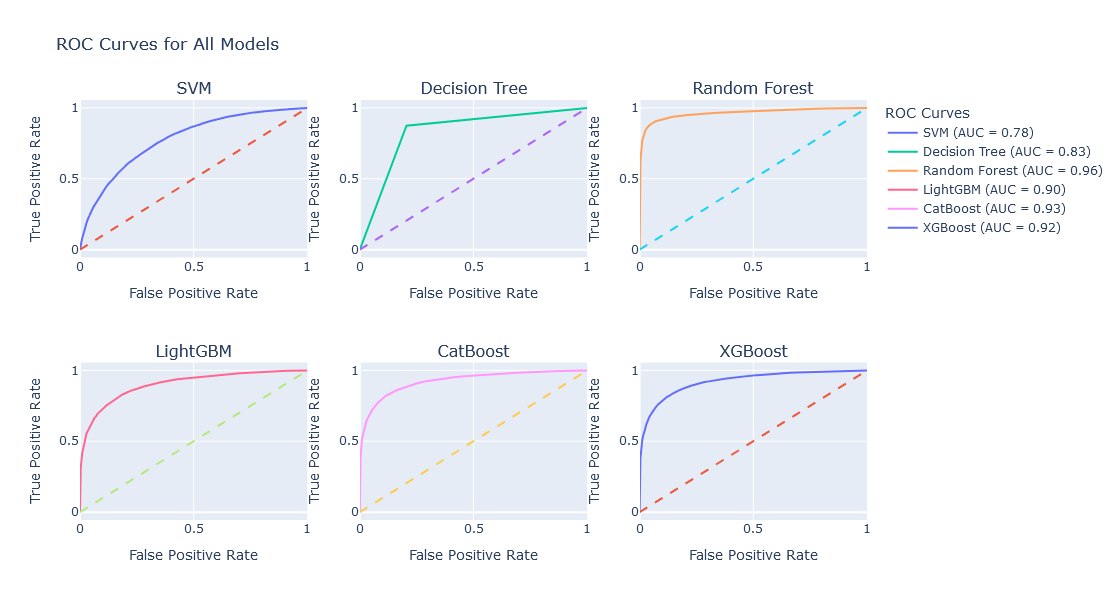

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Initialize the models
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Binarize the labels for ROC curve computation
classes = np.unique(y)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Dictionary to store results
results = {}

# Iterate over each model
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report_dict = classification_report(y_test, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report_dict).transpose()
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store the results
    results[name] = {
        "accuracy": accuracy,
        "classification_report": class_report_df,
        "confusion_matrix": conf_matrix,
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }
    
    # Print the classification report as a table
    print(f"Classification Report for {name}:")
    print(class_report_df.to_string())  # Print the classification report as a table

# Plotting ROC Curves for all models
fig = make_subplots(rows=2, cols=3, subplot_titles=list(results.keys()))

for idx, (name, result) in enumerate(results.items()):
    row = (idx // 3) + 1
    col = (idx % 3) + 1
    fig.add_trace(
        go.Scatter(
            x=result['fpr'],
            y=result['tpr'],
            mode='lines',
            name=f'{name} (AUC = {result["roc_auc"]:.2f})',
            showlegend=True
        ),
        row=row,
        col=col
    )
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[0, 1],
            mode='lines',
            line=dict(dash='dash'),
            showlegend=False
        ),
        row=row,
        col=col
    )
    fig.update_xaxes(title_text="False Positive Rate", row=row, col=col)
    fig.update_yaxes(title_text="True Positive Rate", row=row, col=col)

fig.update_layout(
    title_text="ROC Curves for All Models",
    height=600,
    width=900,
    legend_title_text='ROC Curves'
)

fig.show()


From the result of our features importance we see that the model does better with all the variables rather than using fewer or the most important variables. When we use a moderate cut off of 5% we see the model making use of ('diag_1', 'discharge_disposition_id', 'insulin', 'diabetesMed', 'metformin') variables, and the accuracy of the model drops to 67%, while with all the variable used we have accuracy of 88%. From this we can see that using more variable helps in the better prediction of readmission.

We shall further optimize our model and improve performance metrics through hyperparameter tunning and the use of an ensemble learning technique CatBoost Classifier.

In [142]:
#  hyperparameters tunning using optuna
from sklearn.metrics import f1_score
import optuna
from optuna.samplers import TPESampler
import catboost
def objective(trial):
    model = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        boosting_type= trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        bootstrap_type=trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "MVS"]
        ),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 10,
                                        0.0, log=True),
        #bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        #max_leaves=trial.suggest_int("max_leaves",15,40),
        min_data_in_leaf=trial.suggest_int("min_data_in_leaf",51,120),
        loss_function='Logloss',
        eval_metric='Logloss',
        task_type='GPU',
        verbose=False,
        )
    model.fit(X_train, y_train,eval_set=[(X_test,y_test)])
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred,average='micro')

In [144]:
'''%%time

optuna.logging.set_verbosity(optuna.logging.WARNING)


sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=31)'''

'%%time\n\noptuna.logging.set_verbosity(optuna.logging.WARNING)\n\n\nsampler = TPESampler(seed=1)\nstudy = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)\nstudy.optimize(objective, n_trials=31)'

In [146]:
'''print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))'''

'print("Number of finished trials: ", len(study.trials))\nprint("Best trial:")\ntrial = study.best_trial\nprint("  Value: ", trial.value)\nprint("  Params: ")\nfor key, value in trial.params.items():\n    print("    {}: {}".format(key, value))'

In [148]:
'''fig = optuna.visualization.plot_param_importances(study)
fig.show()'''

'fig = optuna.visualization.plot_param_importances(study)\nfig.show()'

In [150]:
#params={'iterations': 513, 'learning_rate': 0.0397842000536864, 'depth': 7, 'l2_leaf_reg': 0.05206518524157017, 'bootstrap_type': 'Bayesian', 'random_strength': 4.6530700573768906e-07, 'bagging_temperature': 0.1394386439385641, 'od_type': 'IncToDec', 'od_wait': 30}
#params={'iterations': 810, 'learning_rate': 0.02656293600669053, 'depth': 5, 'l2_leaf_reg': 0.28259770270974677, 'bootstrap_type': 'Bayesian', 'random_strength': 3.002070542128706e-05, 'bagging_temperature': 0.7065794059168207, 'od_type': 'IncToDec', 'od_wait': 28}
#params={'iterations': 471, 'learning_rate': 0.0766629782215195, 'depth': 8, 'l2_leaf_reg': 0.0009941919255431284, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0067486415831434e-08, 'bagging_temperature': 0.4183095348176672, 'od_type': 'Iter', 'od_wait': 45}
#params={'iterations': 226, 'learning_rate': 0.002490020818620744, 'depth': 9, 'l2_leaf_reg': 48.15215820395775, 'bootstrap_type': 'Bayesian', 'random_strength': 6.6193844201488494e-06, 'agging_temperature': 6.923226156693141, 'od_type': 'Iter', 'od_wait': 13}
# over sampled full features
#params={'iterations': 899, 'learning_rate': 0.06966733523156289, 'depth': 9, 'l2_leaf_reg': 8.071917904799597e-08, 'bootstrap_type': 'Bayesian', 'random_strength': 0.001980689035613274, 'bagging_temperature': 5.000998021136371, 'od_type': 'IncToDec', 'od_wait': 17}
# over sampled 
params={'iterations': 881, 'learning_rate': 0.01961057467284439, 'depth': 10, 'l2_leaf_reg': 0.0026174150623770134, 'bootstrap_type': 'Bayesian', 'random_strength': 2.191236365450965e-06, 'bagging_temperature': 5.6475486877966965, 'od_type': 'IncToDec', 'od_wait': 42}#params={'iterations': 813, 'learning_rate': 0.09425433483853037, 'depth': 10, 'l2_leaf_reg': 0.00025117779012403147, 'bootstrap_type': 'Bayesian', 'random_strength': 5.2681683837260795, 'bagging_temperature': 9.466232535470276, 'od_type': 'Iter', 'od_wait': 22, 'min_data_in_leaf': 83}

#params={'iterations': 203, 'learning_rate': 0.0792462129989754, 'depth': 7, 'l2_leaf_reg': 0.006079895907372734, 'bootstrap_type': 'Bayesian', 'random_strength': 4.712281485061178e-05, 'bagging_temperature': 2.3702698024302773, 'od_type': 'IncToDec', 'od_wait': 10, 'min_data_in_leaf': 94}

#params={'iterations': 505, 'learning_rate': 0.02782150749600363, 'depth': 4, 'l2_leaf_reg': 0.134465926211342, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0352167279068568e-07, 'bagging_temperature': 1.043841134968342, 'od_type': 'Iter', 'od_wait': 29, 'min_data_in_leaf': 88}

#params={'iterations': 475, 'learning_rate': 0.027583475549166746, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'l2_leaf_reg': 2.855007611568483e-05, 'random_strength': 3.72312200494449e-05, 'bagging_temperature': 5.3881673400335695, 'od_type': 'Iter', 'od_wait': 18, 'min_data_in_leaf': 112}

In [152]:
model=catboost.CatBoostClassifier(**params,verbose=False)


In [154]:
model.fit(X_train,y_train)

In [156]:
probs=model.predict_proba(X_test)
y_pred=model.predict(X_test)

In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     12937
           1       0.86      0.90      0.88     12729

    accuracy                           0.88     25666
   macro avg       0.88      0.88      0.88     25666
weighted avg       0.88      0.88      0.88     25666



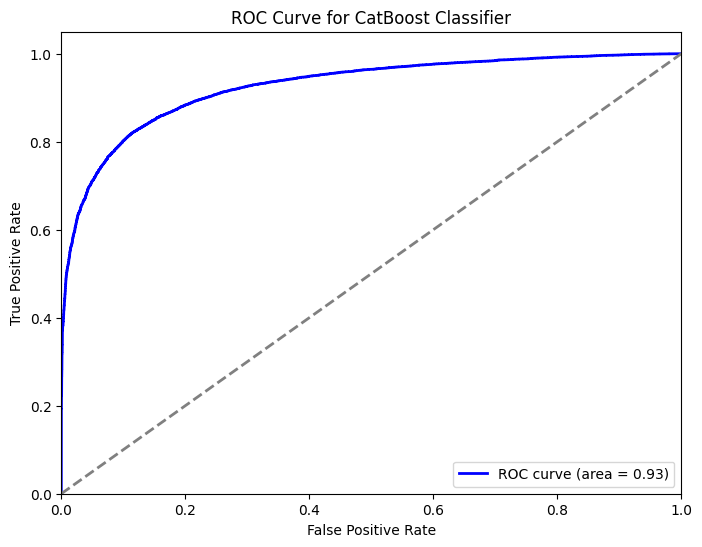

AUC value: 0.9258


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score




# Train the CatBoost model
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Print the AUC value
print(f"AUC value: {roc_auc:.4f}")